In [76]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


In [77]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import astropy.io.fits as fits
import healpy as hp
import nway_python_api as nway
%matplotlib inline

# Nway run in distnce + protometric priors learned from the DESIxCSC data, all auto-calibration mode

In [78]:
ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits', )
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits',)
magnitude_columns = [('nnprior', '../1_csc-desi-photo-prior/model/nn-prior.csv'),
                    ('mag_g', 'auto'),
                    ('mag_r', 'auto'),
                    ('mag_z', 'auto'),
                    ('mag_w1', 'auto'),
                    ('mag_w2', 'auto'),
                    ('col_gr', 'auto'),
                    ('col_rz', 'auto'),
                    ('col_zw1', 'auto'),
                    ('col_rw2', 'auto')]


desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)

In [79]:
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')
ero_pandas

,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,1.101567,3.284168e-12
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,1.157204,1.969860e-12
2,2,b'SRGe J105825.0+564723',164.604366,56.789762,6.277419,1.817511e-12
3,3,b'SRGe J110537.6+585120',166.406669,58.855424,1.120754,1.505411e-12
4,4,b'SRGe J102349.9+563347',155.958041,56.563186,1.093975,1.001123e-12
...,...,...,...,...,...,...
9495,9495,b'SRGe J102315.1+561957',155.813071,56.332561,6.626019,1.637604e-15
9496,9496,b'SRGe J102332.5+562524',155.885436,56.423270,5.401997,1.608667e-15
9497,9497,b'SRGe J102235.0+561919',155.645874,56.321872,5.074748,1.595806e-15
9498,9498,b'SRGe J102223.5+562357',155.597875,56.399058,5.529621,1.532857e-15


This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


    adding angular separation columns
matching:  78684 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:04<00:00, 2254.93it/s]
Incorporating bias "DESI:nnprior" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnprior"


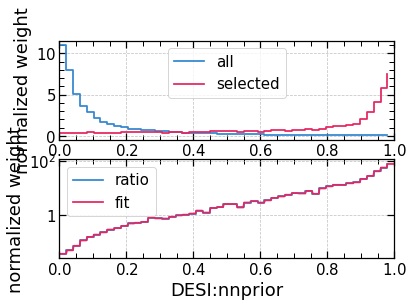

Incorporating bias "DESI:mag_g" ...
magnitude histogram of column "DESI_mag_g": 5674 secure matches, 5786 insecure matches and 2363973 secure non-matches of 2418574 total entries (2369647 valid)


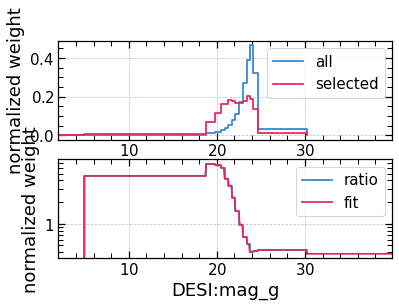

Incorporating bias "DESI:mag_r" ...
magnitude histogram of column "DESI_mag_r": 5720 secure matches, 5786 insecure matches and 2400070 secure non-matches of 2418574 total entries (2405790 valid)


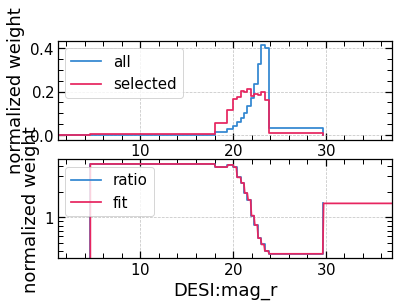

Incorporating bias "DESI:mag_z" ...
magnitude histogram of column "DESI_mag_z": 5738 secure matches, 5786 insecure matches and 2396707 secure non-matches of 2418574 total entries (2402445 valid)


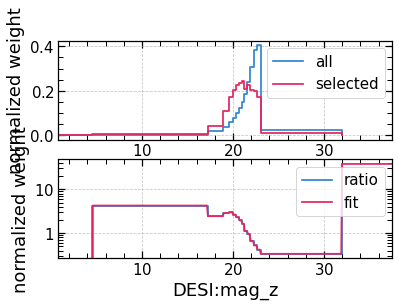

Incorporating bias "DESI:mag_w1" ...
magnitude histogram of column "DESI_mag_w1": 5499 secure matches, 5786 insecure matches and 2116709 secure non-matches of 2418574 total entries (2122208 valid)


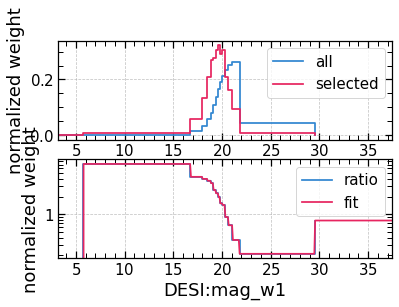

Incorporating bias "DESI:mag_w2" ...
magnitude histogram of column "DESI_mag_w2": 5349 secure matches, 5786 insecure matches and 1830100 secure non-matches of 2418574 total entries (1835449 valid)


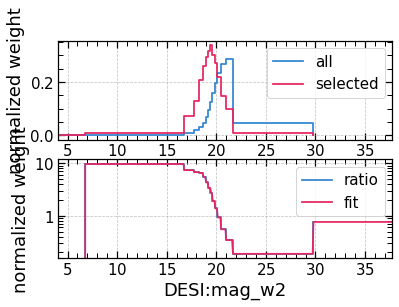

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:375: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:col_gr" ...
magnitude histogram of column "DESI_col_gr": 5652 secure matches, 5786 insecure matches and 2356455 secure non-matches of 2418574 total entries (2362107 valid)


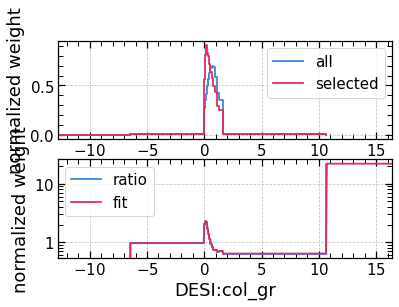

Incorporating bias "DESI:col_rz" ...
magnitude histogram of column "DESI_col_rz": 5699 secure matches, 5786 insecure matches and 2384981 secure non-matches of 2418574 total entries (2390680 valid)


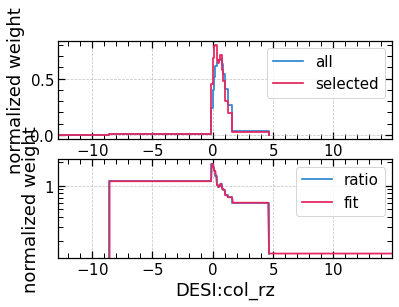

Incorporating bias "DESI:col_zw1" ...
magnitude histogram of column "DESI_col_zw1": 5487 secure matches, 5786 insecure matches and 2109808 secure non-matches of 2418574 total entries (2115295 valid)


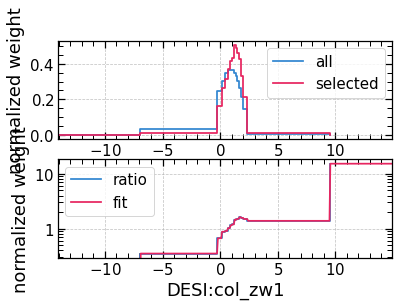

Incorporating bias "DESI:col_rw2" ...
magnitude histogram of column "DESI_col_rw2": 5316 secure matches, 5786 insecure matches and 1821384 secure non-matches of 2418574 total entries (1826700 valid)


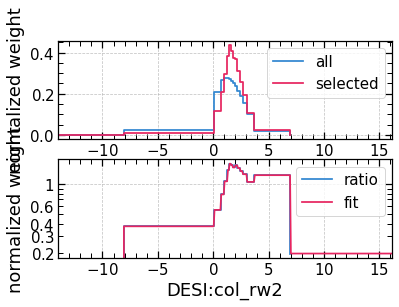


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...
    adding angular separation columns
matching:  54727 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:02<00:00, 3550.30it/s]
Incorporating bias "DESI:nnprior" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnprior"


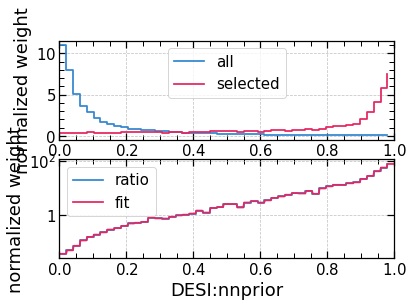

Incorporating bias "DESI:mag_g" ...
magnitude histogram of column "DESI_mag_g": 1045 secure matches, 1076 insecure matches and 2368602 secure non-matches of 2418574 total entries (2369647 valid)


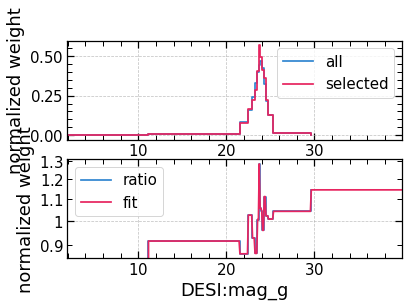

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:375: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:mag_r" ...
magnitude histogram of column "DESI_mag_r": 1071 secure matches, 1076 insecure matches and 2404719 secure non-matches of 2418574 total entries (2405790 valid)


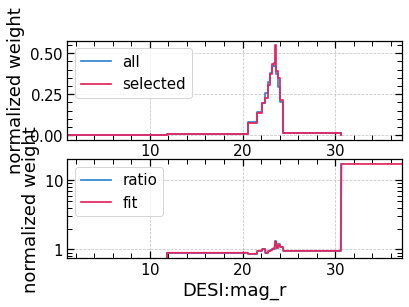

Incorporating bias "DESI:mag_z" ...
magnitude histogram of column "DESI_mag_z": 1069 secure matches, 1076 insecure matches and 2401376 secure non-matches of 2418574 total entries (2402445 valid)


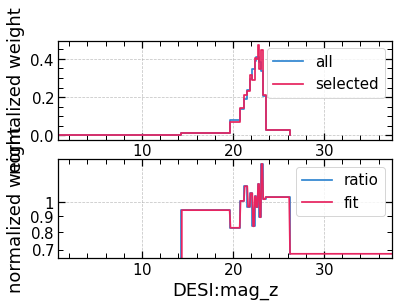

Incorporating bias "DESI:mag_w1" ...
magnitude histogram of column "DESI_mag_w1": 952 secure matches, 1076 insecure matches and 2121256 secure non-matches of 2418574 total entries (2122208 valid)


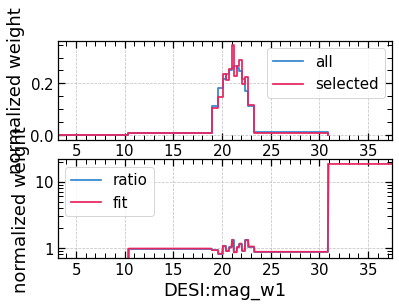

Incorporating bias "DESI:mag_w2" ...
magnitude histogram of column "DESI_mag_w2": 812 secure matches, 1076 insecure matches and 1834637 secure non-matches of 2418574 total entries (1835449 valid)


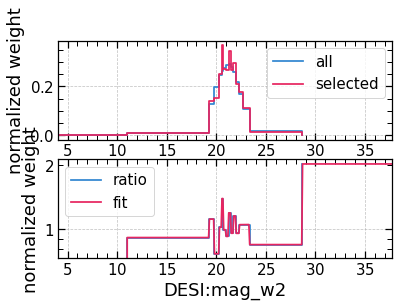

Incorporating bias "DESI:col_gr" ...
magnitude histogram of column "DESI_col_gr": 1042 secure matches, 1076 insecure matches and 2361065 secure non-matches of 2418574 total entries (2362107 valid)


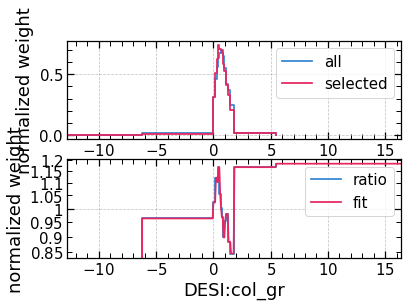

Incorporating bias "DESI:col_rz" ...
magnitude histogram of column "DESI_col_rz": 1064 secure matches, 1076 insecure matches and 2389616 secure non-matches of 2418574 total entries (2390680 valid)


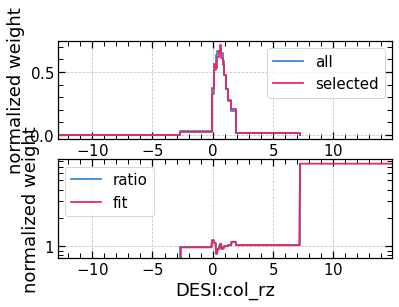

Incorporating bias "DESI:col_zw1" ...
magnitude histogram of column "DESI_col_zw1": 950 secure matches, 1076 insecure matches and 2114345 secure non-matches of 2418574 total entries (2115295 valid)


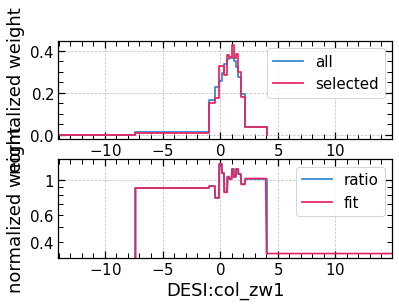

Incorporating bias "DESI:col_rw2" ...
magnitude histogram of column "DESI_col_rw2": 808 secure matches, 1076 insecure matches and 1825892 secure non-matches of 2418574 total entries (1826700 valid)


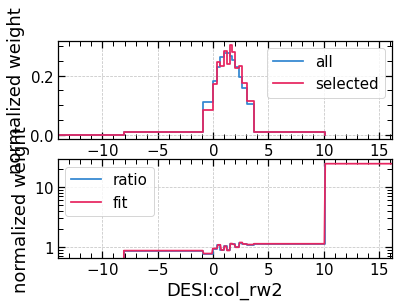


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...
/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:420: RuntimeWarning: invalid value encountered in subtract
  bfsum1 = log10((10**(values[1:] - offset)).sum()) + offset


In [80]:

nway_res_ero_orig = nway.nwaylib.nway_match(
[ero_table, desi_table],
match_radius = 20,
prior_completeness = 1,
mag_include_radius = 3.0,
store_mag_hists = True

)

nway_res_ero_random_orig = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
match_radius = 20,
prior_completeness = 1,
mag_include_radius = 3.0,
store_mag_hists = True
)

In [81]:
nway_res_ero = nway_res_ero_orig
nway_res_ero_random = nway_res_ero_random_orig

In [82]:
nway_res_ero.head(2)

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnprior,bias_DESI_mag_g,bias_DESI_mag_r,bias_DESI_mag_z,bias_DESI_mag_w1,bias_DESI_mag_w2,bias_DESI_col_gr,bias_DESI_col_rz,bias_DESI_col_zw1,bias_DESI_col_rw2,p_single,match_flag,prob_has_match,prob_this_match
0,0,-1,NaN,0.000000,1,0.000000,0.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0,0,1.0,0.0
1,0,10477,0.042512,0.042512,2,10.841974,10.841974,0.96674,75.015815,4.63752,4.200869,4.267256,7.15802,9.704261,0.963221,0.95371,1.187986,1.472348,1.0,1,1.0,1.0


This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py

For a false detection rate of <1%
--> use only counterparts with p_any>0.90 (70.89% of matches)

For a false detection rate of <3%
--> use only counterparts with p_any>0.80 (75.56% of matches)

For a false detection rate of <5%
--> use only counterparts with p_any>0.73 (77.64% of matches)

For a false detection rate of <10%
--> use only counterparts with p_any>0.61 (80.43% of matches)
The efficiency is 83.56%
The purity is  83.45%


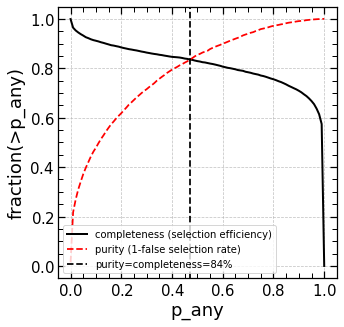

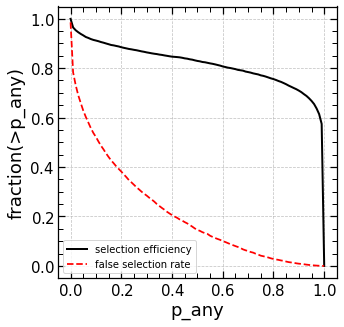

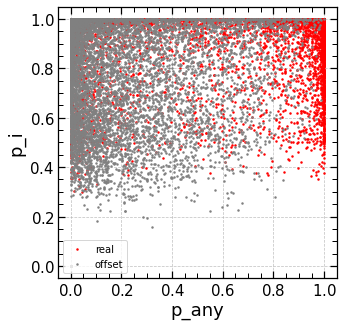

In [84]:
cutoffs, nway_efficiency, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)
#nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)

In [85]:
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero_random.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])

This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


<AxesSubplot:>

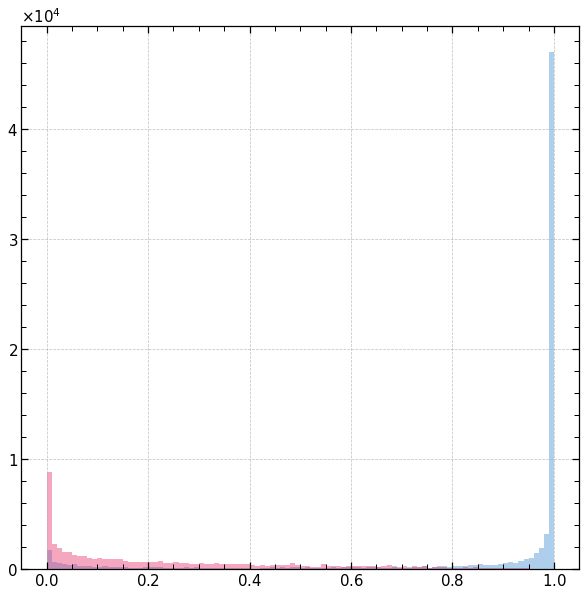

In [86]:
plt.figure(figsize=(10,10))
nway_res_ero.prob_has_match.hist(bins=100, alpha = 0.4)
nway_res_ero_random.prob_has_match.hist(bins=100, alpha = 0.4)

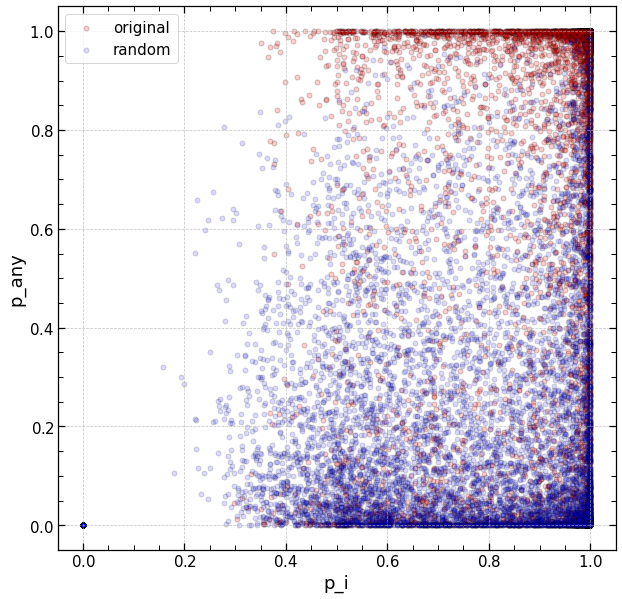

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(nway_res_ero[nway_res_ero.match_flag==1].prob_this_match, nway_res_ero[nway_res_ero.match_flag==1].prob_has_match, alpha = 0.2, c = 'red', label = 'original')
plt.scatter(nway_res_ero_random[nway_res_ero_random.match_flag==1].prob_this_match, nway_res_ero_random[nway_res_ero_random.match_flag==1].prob_has_match, alpha = 0.15, c = 'blue', label = 'random')
plt.xlabel('p_i')
plt.ylabel('p_any')
plt.legend()

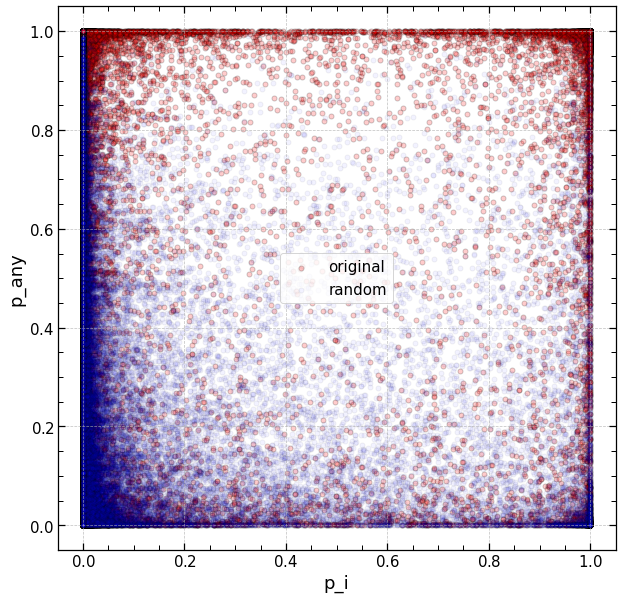

In [88]:
plt.figure(figsize=(10,10))
plt.scatter(nway_res_ero.prob_this_match, nway_res_ero.prob_has_match, alpha = 0.2, c = 'red', label = 'original')
plt.scatter(nway_res_ero_random.prob_this_match, nway_res_ero_random.prob_has_match, alpha = 0.05, c = 'blue', label = 'random')
plt.xlabel('p_i')
plt.ylabel('p_any')
plt.legend()

## Asses the performance of the NWAY with validation catalog (CSC)

In [89]:
print(ero_pandas.head(3))
true_ctps = pd.read_pickle(data_path+'final_ctps_ero_csc_desi.pkl')
true_ctps.head(3)

   EROSITA                        ID          RA        DEC   pos_err  \
0        0  b'SRGe J103744.3+571156'  159.434594  57.198788  1.101567   
1        1  b'SRGe J110137.5+572926'  165.406353  57.490464  1.157204   
2        2  b'SRGe J105825.0+564723'  164.604366  56.789762  6.277419   

      ML_FLUX_0  
0  3.284168e-12  
1  1.969860e-12  
2  1.817511e-12  


,name_csc,desi_id,ID_ero
0,b'2CXO J105316.7+573550',b'9011_609950_3809',b'SRGe J105316.7+573551'
1,b'2CXO J104540.1+584255',b'9011_613768_963',b'SRGe J104540.1+584254'
2,b'2CXO J105335.0+572541',b'9011_609951_491',b'SRGe J105335.1+572543'


In [90]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI', suffixes=('_ero', '_desi'))


nway_res_ero

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnprior,bias_DESI_mag_g,bias_DESI_mag_r,bias_DESI_mag_z,bias_DESI_mag_w1,bias_DESI_mag_w2,bias_DESI_col_gr,bias_DESI_col_rz,bias_DESI_col_zw1,bias_DESI_col_rw2,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id,ra,dec,mag_g,mag_r,mag_z,mag_w1,mag_w2,col_gr,col_rz,col_zw1,col_rw2,nnprior
0,0,10477,0.042512,0.042512,2,10.841974,10.841974,9.667404e-01,75.015815,4.637520,4.200869,4.267256,7.158020,9.704261,0.963221,0.953710,1.187986,1.472348,1.000000e+00,1,1.000000,1.000000e+00,b'SRGe J103744.3+571156',159.434594,57.198788,1.101567,3.284168e-12,b'9011_609162_1184',159.434616,57.198786,16.058165,16.111576,15.616705,14.459218,14.227020,-0.053411,0.494871,1.157487,1.884556,0.990009
1,42,10477,6.767775,6.767775,2,9.125511,9.125511,3.583086e-01,75.015815,4.637520,4.200869,4.267256,7.158020,9.704261,0.963221,0.953710,1.187986,1.472348,9.999974e-01,1,0.999997,1.000000e+00,b'SRGe J103744.5+571149',159.435353,57.196949,5.354416,2.632385e-13,b'9011_609162_1184',159.434616,57.198786,16.058165,16.111576,15.616705,14.459218,14.227020,-0.053411,0.494871,1.157487,1.884556,0.990009
2,0,784834,9.507520,9.507520,2,-5.201348,-5.201348,2.630702e-15,2.529595,0.652696,0.406010,0.336775,0.364158,0.343870,0.963221,1.012747,1.564867,1.451517,1.647859e-16,0,1.000000,8.144817e-24,b'SRGe J103744.3+571156',159.434594,57.198788,1.101567,3.284168e-12,b'9011_609162_1210',159.437965,57.200696,23.338484,23.416210,23.045345,21.072514,21.045940,-0.077726,0.370865,1.972831,2.370270,0.505642
3,42,784834,14.420770,14.420770,2,7.897758,7.897758,3.199308e-02,2.529595,0.652696,0.406010,0.336775,0.364158,0.343870,0.963221,1.012747,1.564867,1.451517,2.065987e-03,0,0.999997,5.326592e-09,b'SRGe J103744.5+571149',159.435353,57.196949,5.354416,2.632385e-13,b'9011_609162_1210',159.437965,57.200696,23.338484,23.416210,23.045345,21.072514,21.045940,-0.077726,0.370865,1.972831,2.370270,0.505642
4,0,2289777,9.399113,9.399113,2,-4.837566,-4.837566,6.079294e-15,0.037455,0.432551,0.375934,0.420679,1.000000,1.000000,0.709802,0.711416,1.000000,1.000000,7.865463e-18,0,1.000000,3.887636e-25,b'SRGe J103744.3+571156',159.434594,57.198788,1.101567,3.284168e-12,b'9011_609162_1223',159.439360,57.199177,25.948793,24.556490,22.966312,NaN,NaN,1.392303,1.590178,NaN,NaN,0.011250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69179,9498,1404956,16.669815,16.669815,2,7.471547,7.471547,1.223545e-02,0.050287,0.403097,0.483581,0.420679,0.364158,0.187767,0.832019,1.012747,1.187986,0.549219,1.920229e-06,0,0.863443,3.036934e-07,b'SRGe J102223.5+562357',155.597875,56.399058,5.529621,1.532857e-15,b'9011_606780_3262',155.591243,56.401882,23.943810,23.180330,22.817085,21.680962,22.693533,0.763480,0.363245,1.136123,0.486797,0.034162
69180,9499,1122765,13.605355,13.605355,2,8.001328,8.001328,4.026241e-02,0.116007,0.521092,0.483581,0.660311,0.364158,0.187767,0.943743,0.886034,1.014669,1.386015,6.510881e-05,1,0.000104,6.280803e-01,b'SRGe J104406.3+545413',161.026353,54.903612,5.174455,1.519228e-15,b'9011_601907_972',161.024090,54.907160,23.701218,23.128086,22.223318,21.463467,21.803545,0.573132,0.904768,0.759851,1.324541,0.077798
69181,9499,1275196,11.494996,11.494996,2,8.430764,8.430764,1.013396e-01,0.050287,0.403097,0.406010,0.420679,0.211929,0.187767,2.294537,1.061128,0.664325,1.066187,2.679250e-05,0,0.000104,2.584473e-01,b'SRGe J104406.3+545413',161.026353,54.903612,5.174455,1.519228e-15,b'9011_601907_1012',161.028362,54.906589,23.844042,23.725538,22.972952,22.823347,22.630081,0.118504,0.752586,0.149605,1.095457,0.033165
69182,9499,1335421,14.935793,14.935793,2,7.693485,7.693485,2.023149e-02,0.050287,0.403097,0.406010,0.522403,0.211929,0.187767,2.171620,0.754813,0.874907,1.606871,8.141154e-06,0,0.000104,7.853018e-02,b'SRGe J104406.3+545413

In [91]:
true_ctps

,name_csc,desi_id,ID_ero
0,b'2CXO J105316.7+573550',b'9011_609950_3809',b'SRGe J105316.7+573551'
1,b'2CXO J104540.1+584255',b'9011_613768_963',b'SRGe J104540.1+584254'
2,b'2CXO J105335.0+572541',b'9011_609951_491',b'SRGe J105335.1+572543'
3,b'2CXO J103215.8+574926',b'9011_610714_4134',b'SRGe J103216.0+574927'
4,b'2CXO J104523.0+555716',b'9011_605186_562',b'SRGe J104523.1+555715'
...,...,...,...
347,b'2CXO J103413.0+581151',b'9011_612249_2337',b'SRGe J103413.7+581151'
348,b'2CXO J104613.4+585941',b'9011_614516_2658',b'SRGe J104614.0+585942'
349,b'2CXO J103429.6+575217',b'9011_610716_580',b'SRGe J103429.8+575220'
350,b'2CXO J104353.9+584043',b'9011_613767_1258',b'SRGe J104353.8+584042'


In [92]:
nway_res_ero['true_ctps'] = False

for desi_id, ero_id in zip(true_ctps['desi_id'], true_ctps['ID_ero']):
    id_tmp  = (nway_res_ero.desi_id == desi_id) & (nway_res_ero.ID==ero_id)
    #print(np.sum(id_tmp))
    nway_res_ero.loc[id_tmp, 'true_ctps'] = True
nway_res_ero

,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnprior,bias_DESI_mag_g,bias_DESI_mag_r,bias_DESI_mag_z,bias_DESI_mag_w1,bias_DESI_mag_w2,bias_DESI_col_gr,bias_DESI_col_rz,bias_DESI_col_zw1,bias_DESI_col_rw2,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id,ra,dec,mag_g,mag_r,mag_z,mag_w1,mag_w2,col_gr,col_rz,col_zw1,col_rw2,nnprior,true_ctps
0,0,10477,0.042512,0.042512,2,10.841974,10.841974,9.667404e-01,75.015815,4.637520,4.200869,4.267256,7.158020,9.704261,0.963221,0.953710,1.187986,1.472348,1.000000e+00,1,1.000000,1.000000e+00,b'SRGe J103744.3+571156',159.434594,57.198788,1.101567,3.284168e-12,b'9011_609162_1184',159.434616,57.198786,16.058165,16.111576,15.616705,14.459218,14.227020,-0.053411,0.494871,1.157487,1.884556,0.990009,False
1,42,10477,6.767775,6.767775,2,9.125511,9.125511,3.583086e-01,75.015815,4.637520,4.200869,4.267256,7.158020,9.704261,0.963221,0.953710,1.187986,1.472348,9.999974e-01,1,0.999997,1.000000e+00,b'SRGe J103744.5+571149',159.435353,57.196949,5.354416,2.632385e-13,b'9011_609162_1184',159.434616,57.198786,16.058165,16.111576,15.616705,14.459218,14.227020,-0.053411,0.494871,1.157487,1.884556,0.990009,False
2,0,784834,9.507520,9.507520,2,-5.201348,-5.201348,2.630702e-15,2.529595,0.652696,0.406010,0.336775,0.364158,0.343870,0.963221,1.012747,1.564867,1.451517,1.647859e-16,0,1.000000,8.144817e-24,b'SRGe J103744.3+571156',159.434594,57.198788,1.101567,3.284168e-12,b'9011_609162_1210',159.437965,57.200696,23.338484,23.416210,23.045345,21.072514,21.045940,-0.077726,0.370865,1.972831,2.370270,0.505642,False
3,42,784834,14.420770,14.420770,2,7.897758,7.897758,3.199308e-02,2.529595,0.652696,0.406010,0.336775,0.364158,0.343870,0.963221,1.012747,1.564867,1.451517,2.065987e-03,0,0.999997,5.326592e-09,b'SRGe J103744.5+571149',159.435353,57.196949,5.354416,2.632385e-13,b'9011_609162_1210',159.437965,57.200696,23.338484,23.416210,23.045345,21.072514,21.045940,-0.077726,0.370865,1.972831,2.370270,0.505642,False
4,0,2289777,9.399113,9.399113,2,-4.837566,-4.837566,6.079294e-15,0.037455,0.432551,0.375934,0.420679,1.000000,1.000000,0.709802,0.711416,1.000000,1.000000,7.865463e-18,0,1.000000,3.887636e-25,b'SRGe J103744.3+571156',159.434594,57.198788,1.101567,3.284168e-12,b'9011_609162_1223',159.439360,57.199177,25.948793,24.556490,22.966312,NaN,NaN,1.392303,1.590178,NaN,NaN,0.011250,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69179,9498,1404956,16.669815,16.669815,2,7.471547,7.471547,1.223545e-02,0.050287,0.403097,0.483581,0.420679,0.364158,0.187767,0.832019,1.012747,1.187986,0.549219,1.920229e-06,0,0.863443,3.036934e-07,b'SRGe J102223.5+562357',155.597875,56.399058,5.529621,1.532857e-15,b'9011_606780_3262',155.591243,56.401882,23.943810,23.180330,22.817085,21.680962,22.693533,0.763480,0.363245,1.136123,0.486797,0.034162,False
69180,9499,1122765,13.605355,13.605355,2,8.001328,8.001328,4.026241e-02,0.116007,0.521092,0.483581,0.660311,0.364158,0.187767,0.943743,0.886034,1.014669,1.386015,6.510881e-05,1,0.000104,6.280803e-01,b'SRGe J104406.3+545413',161.026353,54.903612,5.174455,1.519228e-15,b'9011_601907_972',161.024090,54.907160,23.701218,23.128086,22.223318,21.463467,21.803545,0.573132,0.904768,0.759851,1.324541,0.077798,False
69181,9499,1275196,11.494996,11.494996,2,8.430764,8.430764,1.013396e-01,0.050287,0.403097,0.406010,0.420679,0.211929,0.187767,2.294537,1.061128,0.664325,1.066187,2.679250e-05,0,0.000104,2.584473e-01,b'SRGe J104406.3+545413',161.026353,54.903612,5.174455,1.519228e-15,b'9011_601907_1012',161.028362,54.906589,23.844042,23.725538,22.972952,22.823347,22.630081,0.118504,0.752586,0.149605,1.095457,0.033165,False
69182,9499,1335421,14.935793,14.935793,2,7.693485,7.693485,2.023149e-02,0.050287,0.403097,0.406010,0.522403,0.211929,0.187767,2.171620,0.754813,0.874907,1.60687

100%|██████████| 101/101 [00:00<00:00, 338.07it/s]


(0.8, 1.0)

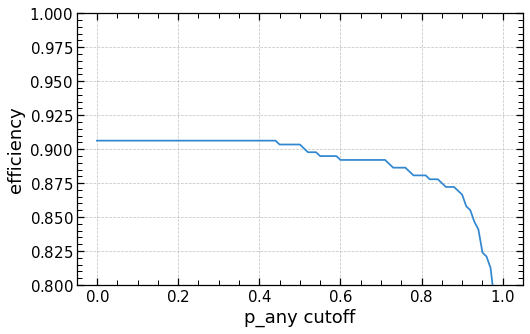

In [94]:
efficiency_validation = []
total_ctps = len(true_ctps)
for cutoff in tqdm(cutoffs):
    nway_res_ero_tmp = nway_res_ero.query("true_ctps==True & match_flag==1 & prob_this_match>@cutoff")
    efficiency = len(nway_res_ero_tmp)/total_ctps
    efficiency_validation.append(efficiency)
efficiency_validation  = np.array(efficiency_validation)

plt.figure(figsize=(8,5))
plt.plot(cutoffs, efficiency_validation)
plt.xlabel('p_any cutoff')
plt.ylabel('efficiency')
plt.ylim(0.8, 1)


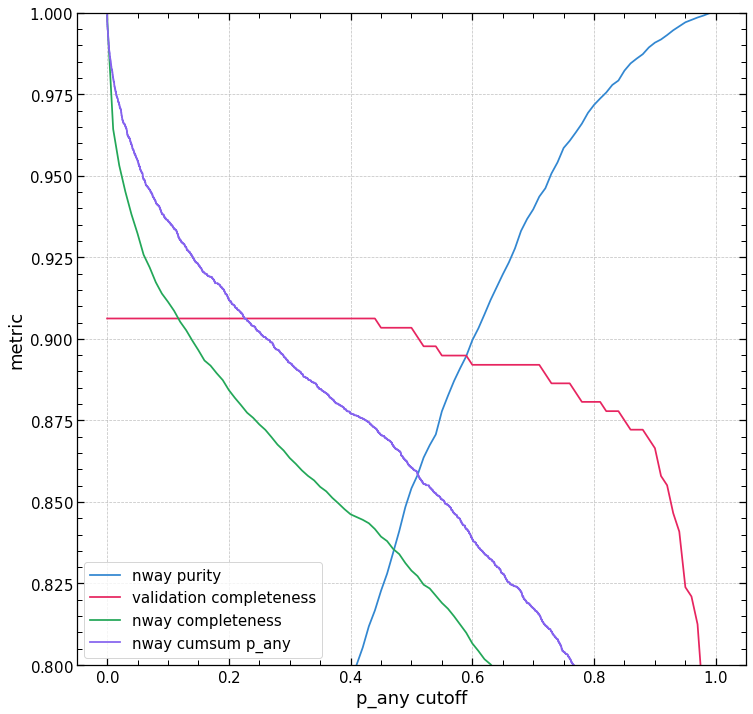

In [120]:

fig,  ax =  plt.subplots( figsize = (12,12))
ax.plot(cutoffs, 1-np.array(nway_purity), label = 'nway purity')
ax.plot(cutoffs, efficiency_validation, label = 'validation completeness')
ax.plot(cutoffs, nway_efficiency, label = 'nway completeness')

sns.ecdfplot(nway_res_ero.prob_has_match, label = 'nway cumsum p_any', complementary=True, ax=ax)

plt.ylim(0.8, 1)
plt.xlabel('p_any cutoff')
plt.ylabel('metric')
plt.legend()